# Dr. Semmelweis and the Discovery of Handwashing

## Project Description
In 1847, the Hungarian physician Ignaz Semmelweis makes a breakthough discovery: 
He discovers handwashing. Contaminated hands was a major cause of childbed fever and by enforcing handwashing at his hospital he saved hundreds of lives.


# Task -1

In [1]:
import pandas as pd

In [2]:
yearly = pd.read_csv(r"C:\Users\welcome\Downloads\Mini project\datasets\yearly_deaths_by_clinic.csv")

In [3]:
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


# Task -2

In [4]:
yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]

In [5]:
yearly1 = yearly[yearly["clinic"] == 'clinic 1']

In [6]:
yearly2 = yearly[yearly["clinic"] == 'clinic 2']

In [7]:
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


# Task -3

Text(0, 0.5, 'Proportion of Deaths')

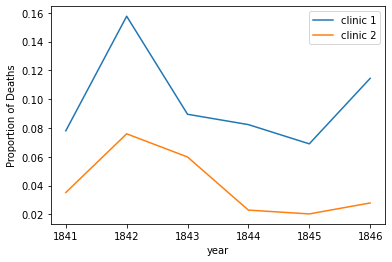

In [8]:
import matplotlib.pyplot as plt

# Plot the proportion of deaths by year for the two clinics
ax=yearly1.plot(x="year", y="proportion_deaths",label ='clinic 1')
yearly2.plot(x="year", y="proportion_deaths",label ='clinic 2',ax=ax)
# Set the plot y labels
ax.set_ylabel("Proportion of Deaths")



# Task 4

In [9]:
monthly = pd.read_csv(r"C:\Users\welcome\Downloads\Mini project\datasets\monthly_deaths.csv", parse_dates=["date"])

In [10]:
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]

In [11]:
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


# Task -5

Text(0, 0.5, 'Proportion of Deaths')

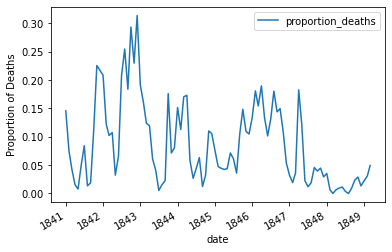

In [12]:
ax=monthly.plot(x="date", y="proportion_deaths")
ax.set_ylabel('Proportion of Deaths')

# Task 6

Text(0, 0.5, 'Proportion of Deaths')

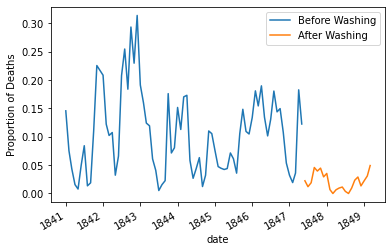

In [14]:
handwashing_start = pd.to_datetime('1847-06-01')
before_washing = monthly[monthly.date < handwashing_start]
after_washing = monthly[monthly.date >= handwashing_start]

#plot
ax = before_washing.plot(x='date', y='proportion_deaths', label='Before Washing')
after_washing.plot(x='date', y='proportion_deaths', label='After Washing', ax=ax)
ax.set_ylabel('Proportion of Deaths')

# Task 7

In [16]:
# Calculate the average proportion of deaths before and after handwashing
before_proportion = before_washing['proportion_deaths'].mean()
after_proportion = after_washing['proportion_deaths'].mean()

# Calculate the reduction in proportion of deaths
reduction = before_proportion - after_proportion 

# Print the average reduction in proportion of deaths due to handwashing
print("Average reduction in proportion of deaths due to handwashing: {:.4f}".format(reduction))


Average reduction in proportion of deaths due to handwashing: 0.0840


# Task 8

In [19]:
from numpy import percentile
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = percentile(boot_mean_diff, [2.5, 97.5])
print(confidence_interval)

AttributeError: 'float' object has no attribute 'sample'

# Task 9

In [63]:
doctors_should_wash_their_hands= True